# Libraries

In [1]:
# plot the graphs inline
%matplotlib inline

In [2]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Introduction

This week we are going to work with some text data. In this folder, you should a text file called 'fullpapers.txt'. This file was generated by converting the proceedings of the EDM (Educational Data Mining) conference of 2018. You can find the proceedings here: http://educationaldatamining.org/EDM2017/proc_files/fullpapers.pdf
We are going to explore the different terms that are used by authors of the papers in this conference, which will require some data cleaning!

# Import the data

Our goal is compare the different papers in terms of the vocabulary used. 
* open the pdf of the proceedings (fullpapers.pdf); 
* open the txt of the proceedigs (fullpapers.txt)

1) we want to split the data into different papers. Brainstorm a few ideas on how to do that:
* Split the entire text into pages and then look for the word 'ABSTRACT' to get the page numbers for each paper

In [3]:
# 2) First we are going to read the fullpapers.txt file 
# and assign its content to a variable called "data"
# hint: https://stackoverflow.com/questions/3758147/easiest-way-to-read-write-a-files-content-in-python
with open('./fullpapers.txt') as f:
    data = f.read()

In [4]:
# 3) To facilitate data processing, we want to split this file
# into different pages. Create a list called "pages" that 
# stores the text presented on each page of the pdf
# Look into the .split() function, what string are we going to want to split by?
pages = data.split('Proceedings of the 10th International Conference on Educational Data Mining')

In [5]:
# 4) because we don't want to deal with upper case / lower case issues
# we are going to lower case everything:
# Try using a list comprehension to accomplish this task
pages = [x.lower() for x in pages]

5) Now we would like to join pages if they below to the same paper. Can you think of keywords we could like for to decided if the current page is starting a new paper? Write down two ideas:
1. Look for the word 'abstract'
2. Look for the word 'introduction'

In [6]:
# 6) create a new list called "papers", which is going to contain 
# all the papers we have. Iterate through all the pages and 
# add a new element to the list when you have a full paper
# Using a for loop to iterate over all the pages, try to think of a conditional statement to check whether a page
# represents a new 'paper'. I.e. what is a common aspect of all papers? 
papers = []
current_paper = ''

# iterate through the pages and add each paper to the list "papers"
for x in pages:
    if 'introduction' in x and 'abstract' in x:
        if current_paper != '':
            papers.append(current_paper)
            current_paper = x
        else:
            current_paper = x
    else:
        current_paper = current_paper + x

In [7]:
# 7) print how many files you have in the "papers" list:
print(len(papers))

17


In [8]:
# 8) print the content of the first two paper to make sure it worked
# (only print the first 300 characters)
print('--- First paper ---\n',papers[0][:300],'\n')
print('--- Second paper ---\n',papers[1][:300], '\n')

--- First paper ---
 zone out no more: mitigating mind wandering during
computerized reading
sidney k. d’mello, caitlin mills, robert bixler, & nigel bosch
university of notre dame
118 haggar hall
notre dame, in 46556, usa
sdmello@nd.edu

abstract
mind wandering, defined as shifts in attention from task-related
process 

--- Second paper ---
 

15

measuring similarity of educational items using data on
learners’ performance
jiří řihák

faculty of informatics
masaryk university
brno, czech republic

thran@mail.muni.cz
abstract
educational systems typically contain a large pool of items
(questions, problems). using data mining techniqu 



In [9]:
# 9) create a new folder called papers; this is where we are 
# going to save each paper into a separate text file
# hint: google "how to create a new folder with python"
newpath = './papers'
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [10]:
# 10) save each paper into its unique file in the "Papers" folder
# we created above
# Hint: "enumerate" can provide you with the index of the paper in the list
# Feel free to use the following filename for the first paper in the list:
# ./Papers/paper0.txt on mac and .\Papers\paper0.txt on windows
for i, x in enumerate(papers):
    file_path = './papers/paper'+ str(i) + '.txt'
    f = open(file_path,"w")
    f.write(x)
    f.close()

You might be asking yourself why we need to save the data into text files (instead of just using the list of papers above). One answer is that when we work with large datastsets, it's useful to save snapshots of our data that is "clean". This way we don't have to re-run all the code above and we save time. It also allows us to share data between different notebooks for other types of analysis!

# Count frequencies

In [11]:
# 11) We are going to practice your "glob" skills - find all the 
# text files in the "Papers" folder with a glob command!
import glob
t_files = glob.glob('./papers/*.txt')

In [12]:
# 12) iterate through each of the text files and read their contents in the variable below:
# Using a for loop, iterate over all the files in the directory, and add them to the list below
text_list = []
for x in t_files:
    with open(x) as f:
        paper = f.read()
        text_list.append(paper)

In [13]:
# 13) Now we are going to compute the frequency of each word across all 
# documents. Feel free to use the link below to help you!
# hint: https://www.datacamp.com/community/tutorials/absolute-weighted-word-frequency
# (look at the first block of code in the article)
# Using the text_list we create in the cell above, iterate over all words and count their frequencies
# If uncomfortable with dictionaries, google python dict
word_freq = defaultdict(int)
for text in text_list:
    for word in text.split():
        word_freq[word]+=1

In [14]:
# 14) If you haven't done so already, create a dataframe from the dictionary
# and print the head of the dataframe
# Just as we did last week with Pandas, we can do this in only a few lines
df = pd.DataFrame.from_dict(word_freq, orient='index').sort_values(0, ascending=False).rename(columns={0: 'abs_freq'})
df.head()

,abs_freq
the,5663
of,3402
and,2704
to,2406
a,2028


What's a problem with the dataframe above? Is there data meaningful?

The data currently consists a whole bunch of uninteresting words.

In [15]:
# 15) We are going to remove the following stop words, so that we see more interesting 
# keywors. Feel free to use the list and hint below to help you:
# hint: https://stackoverflow.com/questions/43716402/remove-row-index-dataframe-pandas
# the .drop() function could prove useful here
STOPWORDS = ['a','able','about','across','after','all','almost','also','am','among',
             'an','and','any','are','as','at','be','because','been','but','by','can',
             'cannot','could','dear','did','do','does','either','else','ever','every',
             'for','from','get','got','had','has','have','he','her','hers','him','his',
             'how','however','i','if','in','into','is','it','its','just','least','let',
             'like','likely','may','me','might','most','must','my','neither','no','nor',
           'not','of','off','often','on','only','or','other','our','own','rather','said',
             'say','says','she','should','since','so','some','than','that','the','their',
             'them','then','there','these','they','this','tis','to','too','twas','us',
             'wants','was','we','were','what','when','where','which','while','who',
             'whom','why','will','with','would','yet','you','your']

for x in STOPWORDS:
    if x in df.index:
        df.drop(x,inplace=True)

In [16]:
# 16) print the top 20 words of your new dataframe: we can do this with a list slice 
df[:20]

,abs_freq
learning,638
data,512
students,421
student,407
=,393
each,350
model,345
more,310
using,278
used,258


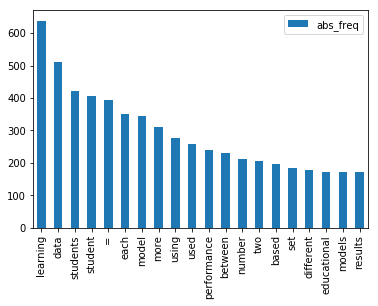

In [17]:
# 17 plot the top 20 results above as a histogram: 
df[:20].plot.bar()
plt.show()

What can you tell from this historgram? What do EDM researchers seem to care about?

There is a much apperance of the words 'learning' and 'data'. In other words, EDM researchers seem to care about the use of data to inform learning.

What are improvements you could add to our data cleaning process? Write at least three things:

- The references at the end of each paper could have been removed so that they do not contribute to the word count.
- Symbols like '=' and numbers like 'two' could also have been included in the list of stopwords.
- Similar words like 'student' and 'students' could have been grouped together.

# Count word frequencies per paper

While the previous section gave us an overall description of the word frequency for all the papers, it would be interesting to look at each individual paper. This is what we are going to do below, by focusing on the top 30 terms used.

In [18]:
# 18) save the top 30 words from the dataframe above 
# in a new variable called "top_words"
top_words = df[:30]

In [19]:
# 19) We are now going to construct a new dataframe where each row is a paper, 
# each column is one of the top 30 words used and each cell is a count of this word. 
# NOTE: make sure you add another field called "text" where you're going to store the 
# actual text of the paper. 
# Hint: build a list of dataframes (one for each papers), 
# and use the concat function from pandas to concatenate them!
d = []
dic={}
paper_word_freq = defaultdict(int)

for i, text in enumerate(text_list):
    dic[str(i)]=text
    # iterate through the top words, add counts to the dictionary
    for word in text.split():
        if word in top_words.index:
            paper_word_freq[word]+=1
    
    df_t = pd.DataFrame.from_dict(paper_word_freq, orient='index').rename(columns={0: str(i)})
    df_t = df_t.T
    # and append the results to the list above (d)
    d.append(df_t)
    paper_word_freq = paper_word_freq.fromkeys(paper_word_freq, 0)

# concatenate the list d into a dataframe
df_concatenated = pd.concat(d)

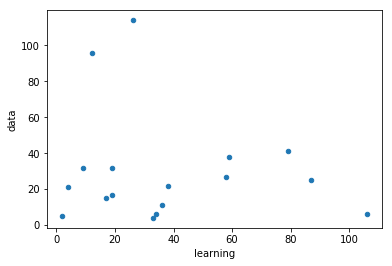

In [20]:
# 20) create a scatter plot of the words 'learning' and 'data'
# what can you say from it?
df_concatenated.plot(x='learning',y='data',kind='scatter')
plt.show()

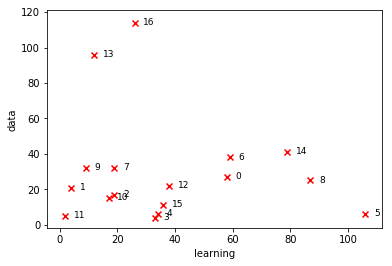

In [21]:
# 21) annotate each point with the index number of the dataframe
# hint: https://www.pythonmembers.club/2018/05/08/matplotlib-scatter-plot-annotate-set-text-at-label-each-point/
# plt.txt( ) is going to be helpful for us here

for i in range(0,17):
    x = df_concatenated['learning'][i]
    y = df_concatenated['data'][i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+3, y-1, str(i), fontsize=9)
    
plt.xlabel('learning')
plt.ylabel('data')
plt.show()

In [22]:
# 22) what are the two extreme papers, 
# i.e., papers with more occurences for each term on each axis?

print('--- Paper with highest frequency of "learning"---\n',dic['5'][:120],'\n')
print('--- Paper with highest frequency of "data" ---\n',dic['16'][:110], '\n')


--- Paper with highest frequency of "learning"---
 

55

toward the automatic labeling of course questions for
ensuring their alignment with learning outcomes
s. supraja
 

--- Paper with highest frequency of "data" ---
 

71

efficient feature embeddings for student classification
with variational auto-encoders
severin klingler 



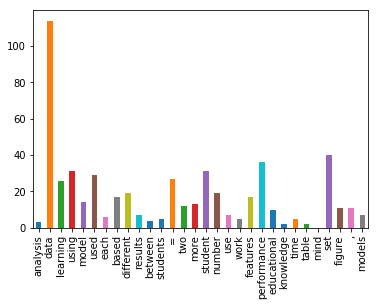

In [23]:
# 23) plot the histogram of the paper that had high counts of "data"
# hint: https://stackoverflow.com/questions/52392728/create-a-histogram-based-on-one-row-of-a-dataframe
# .loc is going to be helpful here

df_concatenated.iloc[16].plot.bar()
plt.show()


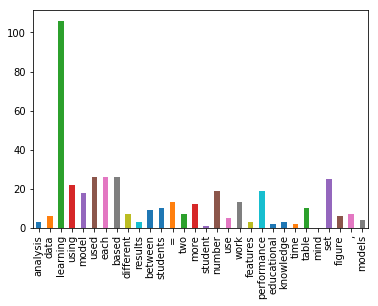

In [24]:
# 24) plot the histogram of the paper that had high counts of "learning"
# .loc is going to be helpful here

df_concatenated.iloc[5].plot.bar()
plt.show()


In [25]:
# 25) what can you observe? 
print('For each paper, there is only one word with a very high count and the rest of the words have a relatively low word count') 

For each paper, there is only one word with a very high count and the rest of the words have a relatively low word count


In [26]:
# 26) print the first 1000 characters of each paper. 

print('--- Paper with highest frequency of "learning"---\n',dic['5'][:1000],'\n')
print('--- Paper with highest frequency of "data" ---\n',dic['16'][:1000], '\n')

# Is your interpretation confirmed?
print('My interpretation is confirmed as the focus for paper 5 is "learning outcomes" while the focus for paper 16 is "educational data mining"')

--- Paper with highest frequency of "learning"---
 

55

toward the automatic labeling of course questions for
ensuring their alignment with learning outcomes
s. supraja

kevin hartman

sivanagaraja tatinati

andy w. h. khong

nanyang technological
university
50 nanyang ave
singapore 639798
ssupraja001@e.ntu.edu.sg

nanyang technological
university
50 nanyang ave
singapore 639798
khartman@ntu.edu.sg

nanyang technological
university
50 nanyang ave
singapore 639798
tatinati@ntu.edu.sg

nanyang technological
university
50 nanyang ave
singapore 639798
andykhong@ntu.edu.sg

abstract
expertise in a domain of knowledge is characterized by a greater
fluency for solving problems within that domain and a greater
facility for transferring the structure of that knowledge to other
domains. deliberate practice and the feedback that takes place
during practice activities serve as gateways for developing domain
expertise. however, there is a difficulty in consistently aligning
feedback about a learn

# Regex

In this section we are going to work with Regex formulas to extract part of the paper. 

In [27]:
# 27) we are going to work on the first paper to make sure that our 
# regex works. Just retrieve the text and assign it to a variable below

with open('./papers/paper0.txt') as f:
    first_paper = f.read()

In [28]:
# 28) find the text between the words 'abstract' and 
# 'introduction' for the first paper using a regex
# https://stackoverflow.com/questions/12736074/regex-matching-between-two-strings/12736203

abstract = re.findall ('abstract(.*\n?)introduction',first_paper,re.DOTALL)

In [29]:
# 29) find the text between the words 'abstract' and 
# 'introduction' for the first paper using the .index() function
start = first_paper.index('abstract') + 8
end = first_paper.index('introduction')
abstract_1 = first_paper[start:end]

In [30]:
# 30) add a new column namd "abstract" to the dataframe above 
# and initialize it with an empty string
df_concatenated['abstract'] = ''

In [31]:
# now add the abstracts to each row of the dataframe using either
# of the two methods above
# Hint: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

for i in df_concatenated.index:
    t = dic[str(i)]
    df_concatenated.at[i,'abstract'] = re.findall('abstract(.*\n?)introduction', t ,re.DOTALL)


In [32]:
# 31) print your abstracts (they should contain a lot of \n = carriage return)

for i in df_concatenated.index:
    print(df_concatenated['abstract'][i])

['\nthis study investigates a possible way to analyze chat data from\ncollaborative learning environments using epistemic network\nanalysis and topic modeling. a 300-topic general topic model\nbuilt from tasa (touchstone applied science associates) corpus was used in this study. 300 topic scores for each of the 15,670\nutterances in our chat data were computed. seven relevant topics\nwere selected based on the total document scores. while the aggregated topic scores had some power in predicting students’\nlearning, using epistemic network analysis enables assessing the\ndata from a different angle. the results showed that the topic\nscore based epistemic networks between low gain students and\nhigh gain students were significantly different (𝑡 = 2.00). overall,\nthe results suggest these two analytical approaches provide complementary information and afford new insights into the processes\nrelated to successful collaborative interactions.\n\nkeywords\nchat; collaborative learning; topi

In [33]:
# 32) clean the abstract column using the "apply" function with a lambda
# Hint: https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html

df_concatenated['abstract'] = str(df_concatenated['abstract'])
df_concatenated['abstract'] = df_concatenated['abstract'].apply(lambda x: x.rstrip('\n'))

## Comparing documents using TF-IDF

In [ ]:
# 33) now we are going to do something a little more advanced:'
# we are going to compute the similarity between two texts
# using a method called tf-idf (we'll talk more about it later)
# Hint: https://stackoverflow.com/questions/43631533/similarity-between-two-text-documents-in-python
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


34) What can you observe?

In [ ]:
# 35) repeat the same procedure with the entire papers
# Use the same logic as the previous cell, but use the text_list variable that we defined previously


In [ ]:
# 36) What are two documents that seem to be very similar?
# print their abstract: 
# print the first 1000 characters of each paper. 


In [ ]:
# 37) what seems to be similar between them? 

# they both talk about analyzing questions and answers from students

## Free exploration (Optional)

- try to extract the names of the author
- find a way to get the top words shared across two texts
- use a regex (or any other method) to get the list of references